This notebook demonstrates how to use `thistothat` to get a handy little Python function encapsulating some relationship from the astrophysics literature (to convert from "this" to "that"). We'll start off by importing two examples of a set of relationships: the theoretical stellar structure models of Baraffe et al. (2015) and the Mamajek table of main-sequence stellar properties.

In [1]:
# import a particular relation class definition
from thistothat import Baraffe, Mamajek
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

### the Baraffe models
These contain theoretical stellar models, defaulting here to a stellar age of 5 Gyr, which is pretty reasonable for most field stars.

In [2]:
# create relation objects
b = Baraffe()
b.summarize()

      [baraffe] loading data from /Users/zkbt/Dropbox/code/python/packages/thistothat/thistothat/data/baraffe/BHAC15_iso.CIT2.txt
      [baraffe]    ...success!
      [baraffe] setting the Baraffe model age to 5.0 Gyr
      [baraffe] 
      [baraffe] The columns in Baraffe_5Gyr are:
      [baraffe]                 mass = Mass of the star, in solar masses.
      [baraffe]                 Teff = Stellar effective temperature, in K.
      [baraffe]                 logL = log10(Luminosity), in solar luminosities.
      [baraffe]                 logg = log10(Surface Gravity), in cm/s^2.
      [baraffe]               radius = Radius of the star, in solar radii.
      [baraffe]              lithium = Ratio of surface lithium abundance to initial abundance.
      [baraffe]                   Mv = Absolute V magnitude (Cousin).
      [baraffe]                   Mr = Absolute R magnitude (Cousin).
      [baraffe]                   Mi = Absolute I magnitude (Cousin).
      [baraffe]               

### the Mamajek table
This contains averaged estimates for main-sequence stars.

In [3]:
m = Mamajek()
m.summarize()

      [mamajek] loading data from /Users/zkbt/Dropbox/code/python/packages/thistothat/thistothat/data/mamajek_dwarfproperties.txt
      [mamajek]    ...success!
      [mamajek] 
      [mamajek] The columns in TheMamajekCuratedStars are:
      [mamajek]                  SpT = (string) Spectral type of the star.
      [mamajek]                 Teff = Stellar Effective Temperature, in K.
      [mamajek]                 logT = log10(Teff), where Teff is in K.
      [mamajek]                  BCv = Bolometric Correction from V band, in magnitudes.
      [mamajek]                   Mv = Absolute V magnitude for a dwarf star.
      [mamajek]                 logL = log10(Luminosity), in solar luminosities.
      [mamajek]                  B-V = B-V color
      [mamajek]                Bt-Vt = Bt-Vt color
      [mamajek]                  V-G = V-G color
      [mamajek]                  U-B = U-B color
      [mamajek]                 V-Rc = V-Rc color
      [mamajek]                 V-Ic = V-Ic 

# Comparing Mass-Radius Estimates:
Now the objects `b` and `m` are handy little objects than contains all the data for the Baraffe models and the Mamajek table of spectral type standards. They can create functions to convert from some quantities to other quantities (for example, a function `f` where `that = f(this)`). 

      [baraffe] creating interpolator to convert mass to radius
      [mamajek] creating interpolator to convert Msun to R_Rsun


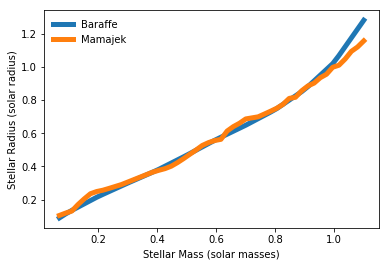

In [4]:
# create an arbitrary array of mass values
b_MR = b.tofrom('radius')('mass')
m_MR = m.tofrom('R_Rsun')('Msun')

xmin, xmax = b.limits('mass')
masses = np.linspace(xmin, xmax)
plt.plot(masses, b_MR(masses), linewidth=5, label='Baraffe')
plt.plot(masses, m_MR(masses), linewidth=5, label='Mamajek')

plt.legend(frameon=False)
plt.xlabel('Stellar Mass (solar masses)')
plt.ylabel('Stellar Radius (solar radius)');

It looks like these *broadly* agree. The Baraffe estimates are generally probably pretty reasonable to use for general purposes, although you'll want to revisit this more carefully for super-precision work.

### Citations:
Of course, this is just a wrapper to a lot of very difficult astrophysics that other people did. If you use any of these relations, please be sure to cite the original sources! To help out, each relation should have a bibcode associated with it that you could feed into [NASA ADS](https://ui.adsabs.harvard.edu) to get the original reference for the relationship.

In [5]:
print('The Baraffe models are described in {}'.format(b.bibcode))
print('The Mamajek table is described in {}'.format(m.bibcode))


The Baraffe models are described in 2015A%26A...577A..42B
The Mamajek table is described in 2013ApJS..208...9P


Have fun playing with these relations!